In [1]:
import pandas as pd  # 导入Pandas
import numpy as np  # 导入NumPy

dir = './dataset/'
dir_train = dir + 'Clothing Reviews.csv'
df_train = pd.read_csv(dir_train)  # 读入训练集
df_train.head()  # 输出部分数据

,id,Review Text,Rating
0,0,Absolutely wonderful - silky and comfortable,4
1,1,Love this dress! it's sooo pretty. i happene...,5
2,2,I had such high hopes for this dress and reall...,3
3,3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,4,This shirt is very flattering to all due to th...,5


In [2]:
from keras.preprocessing.text import Tokenizer  # 导入分词工具

X_train_lst = df_train["Review Text"].values  # 将评论读入张量(训练集)
y_train = df_train["Rating"].values  # 构建标签集
dictionary_size = 20000  # 设定词典的大小
tokenizer = Tokenizer(num_words=dictionary_size)  # 初始化词典
tokenizer.fit_on_texts(X_train_lst)  # 使用训练集创建词典索引
# 为所有的单词分配索引值，完成分词工作
X_train_tokenized_lst = tokenizer.texts_to_sequences(X_train_lst)

2023-07-02 12:36:24.665576: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


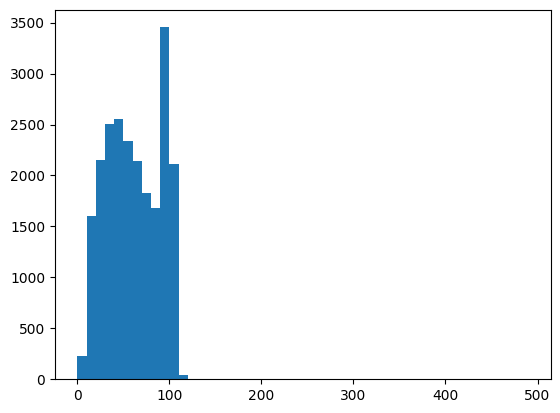

In [3]:
import matplotlib.pyplot as plt  # 导入matplotlib

word_per_comment = [len(comment) for comment in X_train_tokenized_lst]
plt.hist(word_per_comment, bins=np.arange(0, 500, 10))  # 显示评论长度分布
plt.show()

In [4]:
from keras.utils import pad_sequences

max_comment_length = 120  # 设定评论输入长度为100，并填充默认值(如字数少于120)
X_train = pad_sequences(X_train_tokenized_lst, maxlen=max_comment_length)

In [5]:
from keras.models import Sequential  # 导入贯序模型
from keras.layers import Embedding  #导入词嵌入层
from keras.layers import Dense  #导入全连接层
from keras.layers import SimpleRNN  #导入SimpleRNN层

embedding_vecor_length = 60  # 设定词嵌入向量长度为60
rnn = Sequential()  # 贯序模型
rnn.add(Embedding(dictionary_size, embedding_vecor_length,
                  input_length=max_comment_length))  # 加入词嵌入层
rnn.add(SimpleRNN(100))  # 加入SimpleRNN层
rnn.add(Dense(10, activation='relu'))  # 加入全连接层
rnn.add(Dense(6, activation='softmax'))  # 加入分类输出层
rnn.compile(loss='sparse_categorical_crossentropy',  #损失函数
            optimizer='adam',  # 优化器
            metrics=['acc'])  # 评估指标
print(rnn.summary())  #打印网络模型

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 60)           1200000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               16100     
                                                                 
 dense (Dense)               (None, 10)                1010      
                                                                 
 dense_1 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1,217,176
Trainable params: 1,217,176
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
history = rnn.fit(X_train, y_train,
                  validation_split=0.3,
                  epochs=10,
                  batch_size=64)

Epoch 1/10
248/248 [==============================] - 11s 37ms/step - loss: 1.2171 - acc: 0.5586 - val_loss: 1.1603 - val_acc: 0.5566
Epoch 2/10
248/248 [==============================] - 9s 35ms/step - loss: 1.0279 - acc: 0.5945 - val_loss: 1.0460 - val_acc: 0.5810
Epoch 3/10
248/248 [==============================] - 9s 35ms/step - loss: 0.8990 - acc: 0.6344 - val_loss: 1.1741 - val_acc: 0.5013
Epoch 4/10
248/248 [==============================] - 9s 35ms/step - loss: 0.7918 - acc: 0.6804 - val_loss: 1.2355 - val_acc: 0.5024
Epoch 5/10
248/248 [==============================] - 8s 34ms/step - loss: 0.6939 - acc: 0.7183 - val_loss: 1.3899 - val_acc: 0.4715
Epoch 6/10
248/248 [==============================] - 9s 34ms/step - loss: 0.5443 - acc: 0.7831 - val_loss: 1.4731 - val_acc: 0.5323
Epoch 7/10
248/248 [==============================] - 8s 34ms/step - loss: 0.4303 - acc: 0.8330 - val_loss: 1.6745 - val_acc: 0.5042
Epoch 8/10
248/248 [==============================] - 9s 34ms/step -

In [7]:
from keras.models import Sequential  # 导入贯序模型
from keras.layers import Embedding  #导入词嵌入层
from keras.layers import Dense  #导入全连接层
from keras.layers import LSTM  #导入LSTM层

embedding_vecor_length = 60  # 设定词嵌入向量长度为60
lstm = Sequential()  # 贯序模型
lstm.add(Embedding(dictionary_size, embedding_vecor_length,
                   input_length=max_comment_length))  # 加入词嵌入层
lstm.add(LSTM(100))  # 加入LSTM层
lstm.add(Dense(10, activation='relu'))  # 加入全连接层
lstm.add(Dense(6, activation='softmax'))  # 加入分类输出层
lstm.compile(loss='sparse_categorical_crossentropy',  #损失函数
             optimizer='adam',  # 优化器
             metrics=['acc'])  # 评估指标
history = rnn.fit(X_train, y_train,
                  validation_split=0.3,
                  epochs=10,
                  batch_size=64)

Epoch 1/10
  1/248 [..............................] - ETA: 9s - loss: 0.1324 - acc: 0.9531

2023-07-02 12:56:43.320463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-02 12:56:43.323657: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-02 12:56:43.325296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

248/248 [==============================] - 9s 36ms/step - loss: 0.1642 - acc: 0.9416 - val_loss: 2.7350 - val_acc: 0.4750
Epoch 2/10
248/248 [==============================] - 8s 34ms/step - loss: 0.1301 - acc: 0.9546 - val_loss: 2.8083 - val_acc: 0.4821
Epoch 3/10
248/248 [==============================] - 8s 34ms/step - loss: 0.1192 - acc: 0.9601 - val_loss: 2.8358 - val_acc: 0.4846
Epoch 4/10
248/248 [==============================] - 9s 35ms/step - loss: 0.0885 - acc: 0.9708 - val_loss: 3.3324 - val_acc: 0.4693
Epoch 5/10
248/248 [==============================] - 8s 34ms/step - loss: 0.0646 - acc: 0.9782 - val_loss: 3.3673 - val_acc: 0.4932
Epoch 6/10
248/248 [==============================] - 9s 35ms/step - loss: 0.0636 - acc: 0.9783 - val_loss: 3.3752 - val_acc: 0.5071
Epoch 7/10
248/248 [==============================] - 8s 34ms/step - loss: 0.0616 - acc: 0.9780 - val_loss: 3.5471 - val_acc: 0.4951
Epoch 8/10
248/248 [==============================] - 8s 33ms/step - loss: 0.055